<a href="https://colab.research.google.com/github/sm0223/boston_housing_prediction/blob/main/housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Input Features
 1) CRIM: per capita crime rate by town 
 2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
 3) INDUS: proportion of non-retail business acres per town
 4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
 6) RM: average number of rooms per dwelling
 7) AGE: proportion of owner-occupied units built prior to 1940
 8) DIS: weighted distances to five Boston employment centres
 9) RAD: index of accessibility to radial highways
 10) TAX: full-value property-tax rate per $10,000 [$/10k]
 11) PTRATIO: pupil-teacher ratio by town
 12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 13) LSTAT: % lower status of the population

# Problem Statement
 Explore Various LInear Regression Model to predict Median value of Owner Occupied Houses

Output variable:
 1) MEDV: Median value of owner-occupied homes in $1000's [k$]
    

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #For getting the heatmap

In [44]:
df = pd.read_csv("boston.csv");
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#  Splitting Data for Training Model and Test

In [45]:
train = df.sample(frac = 0.75, random_state= 200)
test = df.drop(train.index)
train.describe()
# test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,3.823358,11.048684,11.399053,0.063158,0.558408,6.269495,69.285789,3.747323,9.810526,413.102632,18.536053,356.795526,12.984158,22.223421
std,9.148303,22.965981,6.866142,0.243567,0.116401,0.719133,27.901564,2.068384,8.775469,170.462532,2.173695,90.724360,7.283353,9.320596
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,188.000000,12.600000,2.520000,1.920000,5.000000
25%,0.090170,0.000000,5.560000,0.000000,0.458000,5.876500,45.675000,2.083175,4.000000,283.250000,17.400000,376.132500,7.320000,16.500000
50%,0.295030,0.000000,9.900000,0.000000,0.538000,6.175000,78.500000,3.142300,5.000000,330.000000,19.100000,391.045000,11.675000,20.700000
75%,4.232120,12.500000,18.100000,0.000000,0.631000,6.590750,94.300000,5.104475,24.000000,666.000000,20.200000,395.755000,17.225000,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Analysis

In [46]:
train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,3.823358,11.048684,11.399053,0.063158,0.558408,6.269495,69.285789,3.747323,9.810526,413.102632,18.536053,356.795526,12.984158,22.223421
std,9.148303,22.965981,6.866142,0.243567,0.116401,0.719133,27.901564,2.068384,8.775469,170.462532,2.173695,90.724360,7.283353,9.320596
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,188.000000,12.600000,2.520000,1.920000,5.000000
25%,0.090170,0.000000,5.560000,0.000000,0.458000,5.876500,45.675000,2.083175,4.000000,283.250000,17.400000,376.132500,7.320000,16.500000
50%,0.295030,0.000000,9.900000,0.000000,0.538000,6.175000,78.500000,3.142300,5.000000,330.000000,19.100000,391.045000,11.675000,20.700000
75%,4.232120,12.500000,18.100000,0.000000,0.631000,6.590750,94.300000,5.104475,24.000000,666.000000,20.200000,395.755000,17.225000,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

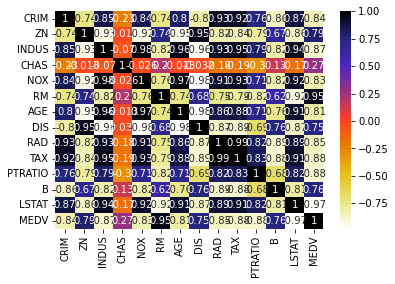

In [50]:
co_rel = train.corr()
sns.heatmap(co_rel, annot = True, cmap=plt.cm.CMRmap_r)

**Points taken from the heatmap and labels** 

    1. The above heat map shows RAD and TAX columns are highly positively correlated(property tax is proportional to accesibility to highway which seems logical) thus, one of them can be dropped.

    2. Although Age and NOX seems to correlated in the data but I decided to keep it as they donot seem to have any logical correlation
    3. 